<a href="https://colab.research.google.com/github/hailStony2017/trends/blob/main/trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pytrends

In [3]:
import pandas as pd
import pandas_datareader as web
import datetime
from sklearn import preprocessing
from pytrends.request import TrendReq


Find trends and price correlation between bitcoin and BTC-USD
Find trends and price correlation between ethereum and ETH-USD
Find trends and price correlation between litecoin and LTC-USD
Find trends and price correlation between Tesla and TSLA


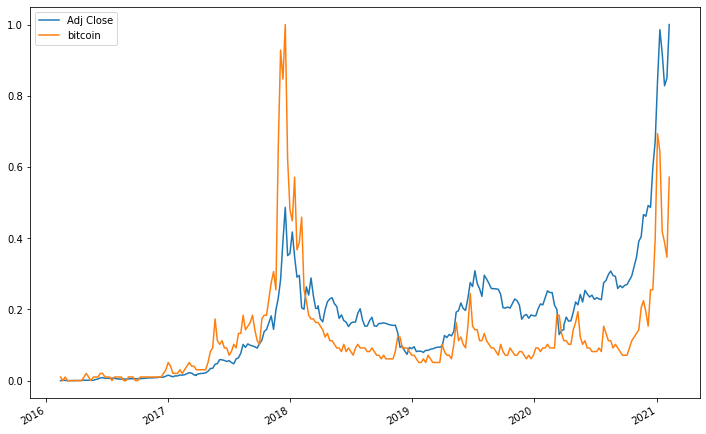

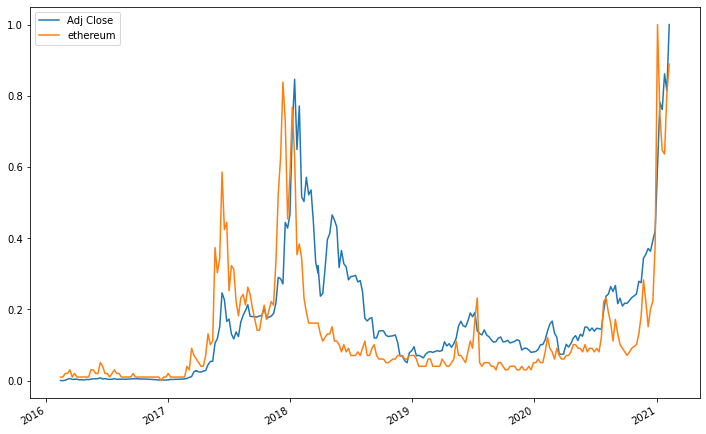

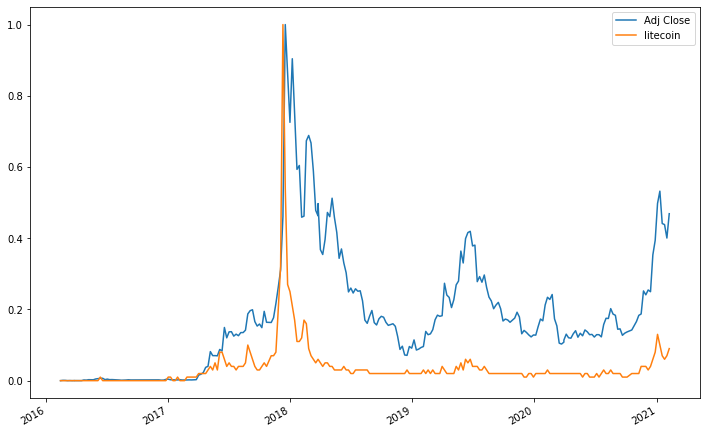

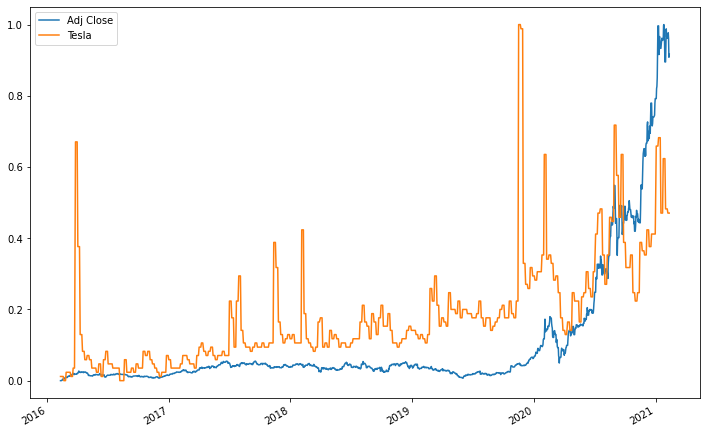

In [4]:
interest_list = [
                 ('bitcoin', 'BTC-USD'),
                 ('ethereum', 'ETH-USD'),
                 ('litecoin', 'LTC-USD'),
                 ('Tesla', 'TSLA')
]

pytrend = TrendReq(hl='en-US', tz=360)

for interest in interest_list:

  end = datetime.datetime.now()
  start = datetime.datetime(end.year-5, end.month, end.day)

  print(f"Find trends and price correlation between {interest[0]} and {interest[1]}")

  # Read trends data from pytrends
  pytrend.build_payload(kw_list=[interest[0]], timeframe='today 5-y')
  # Interest over time
  df1 = pytrend.interest_over_time()
  #df1 = pytrend.get_historical_interest([interest[0]], year_start=start.year, month_start=start.month, day_start=start.day, year_end=end.year, month_end=end.month, day_end=end.day)
  #df1.plot()  

  # Read Stock Data from Yahoo Finance

  df2 = web.DataReader(interest[1], 'yahoo', start, end)
  #df2.plot()
  #df2.rename(columns={'Date': 'date'})
  #print(df2.tail(20).index)

  # Merge trends data and stock price and scale columns
  #merged_df = pd.merge(df1.reset_index(), df2.reset_index(), how='inner', left_index=True, right_index=True)

  try:
    mdf = pd.concat([df1,df2], axis=1).ffill().bfill()
  except: 
    mdf = pd.merge(df1, df2, how='inner', left_index=True, right_index=True)
  min_max_scaler = preprocessing.MinMaxScaler()
  mdf[['Adj Close', interest[0]]] = min_max_scaler.fit_transform(mdf[['Adj Close', interest[0]]])
  mdf.plot(y=['Adj Close', interest[0]], figsize=(12,8))
